<center>
<h3><b>Réalisé par Marouane Lafdi</b></h3>
<h1><b>Rapport Scientifique du Module Bases de Données et Data Science</b></h1>
</center>

## **Introduction**

### **1. Contexte du projet:**
Dans un contexte bancaire de plus en plus concurrentiel, la fidélisation des clients est devenue un enjeu stratégique majeur. Les institutions financières disposent aujourd’hui de grandes quantités de données décrivant le profil de leurs clients (âge, solde, ancienneté, nombre de produits, score de crédit, etc.).
L’exploitation de ces données à l’aide des techniques de data science et de machine learning permet d’anticiper le comportement des clients, notamment leur probabilité de quitter la banque (churn).

Ce notebook s’inscrit dans ce cadre et exploite un jeu de données réel de clients bancaires afin d’analyser leurs caractéristiques et de construire des modèles prédictifs.

### **2. Objectif:**
L’objectif principal de ce notebook est de :

- Analyser et comprendre les données clients à travers une analyse exploratoire (EDA),

- Prétraiter les données (nettoyage, encodage des variables catégorielles, normalisation),

- Gérer le déséquilibre des classes à l’aide de techniques de rééchantillonnage,

- Construire et évaluer des modèles de classification capables de prédire si un client va quitter la banque ou non,

- **Comparer** les performances des modèles à l’aide de métriques adaptées (accuracy, précision, rappel, F1-score, matrice de confusion).

### **3. Problématique du projet:**
La problématique centrale abordée dans ce notebook est la suivante :

Comment prédire efficacement le churn des clients bancaires à partir de leurs données démographiques, financières et comportementales, tout en tenant compte du déséquilibre des classes et en garantissant de bonnes performances de prédiction ?

Cette problématique soulève plusieurs défis :

- la qualité et la préparation des données,

- le choix des variables pertinentes,

- la gestion du déséquilibre entre clients quittant la banque et ceux restant fidèles,

- la sélection du modèle de classification le plus performant et le plus robuste.

## **Importation et Installation des Packages Python**

In [1]:
pip install matplotlib

In [2]:
pip install pandas numpy

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

## **Chargement des Données**

Pour réaliser notre réalisé, nous devrons importer une base
de données (data set), qui est disponible sur Kaggle: https://www.kaggle.com/datasets/shubh0799/churn-modelling?resource=download. Nous avons
choisi une data set qui décrit le taux de désabonnement qui est une
mesure importante que les entreprises doivent suivre lorsqu'elles tentent de développer leurs activités. Cette métrique représente le nombre de clients qui ont cessé d'utiliser votre produit ou service
pendant une période donnée

In [4]:
df=pd.read_csv("Churn_Modelling.csv")

In [5]:
pd.set_option("display.max.columns", None)

In [6]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# **Data Preprocessing**

In [7]:
print("Voici tous les attibuts de notre base de données : \n{}".format(df.keys()))

Voici tous les attibuts de notre base de données : 
Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


### Suppression des colonnes qui n'ont aucun sens

In [8]:
df=df.drop(columns="CustomerId",axis=1)
df=df.drop(columns="Surname",axis=1)
df=df.drop(columns="RowNumber",axis=1)

### Déterminer les caractéristiques des variables numériques

In [9]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### Déterminer les caractéristiques des variables categoriques

In [10]:
df.describe(include="object")

,Geography,Gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


## Analyse Exploratoire des Données - EDA

<Axes: >

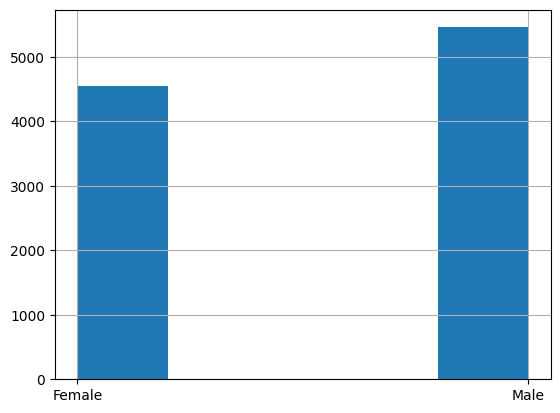

In [12]:
df["Gender"].hist(density=False,bins=5)

<Axes: >

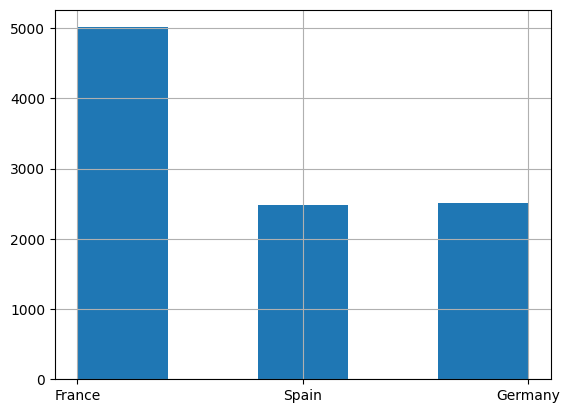

In [13]:
df["Geography"].hist(bins=5)

Text(0.5, 1.0, 'Histogramme HasCrCard')

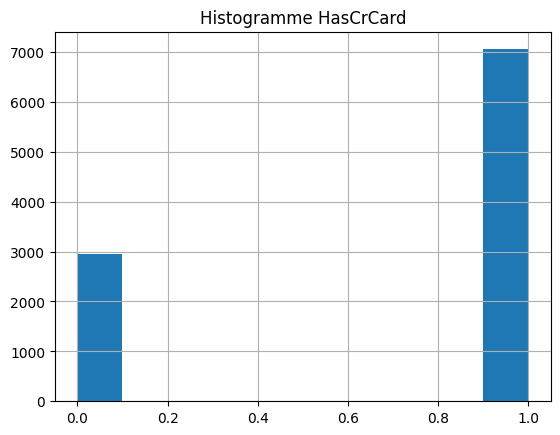

In [14]:
df["HasCrCard"].hist()
plt.title("Histogramme HasCrCard")

Text(0.5, 1.0, 'Histogramme IsActiveMember')

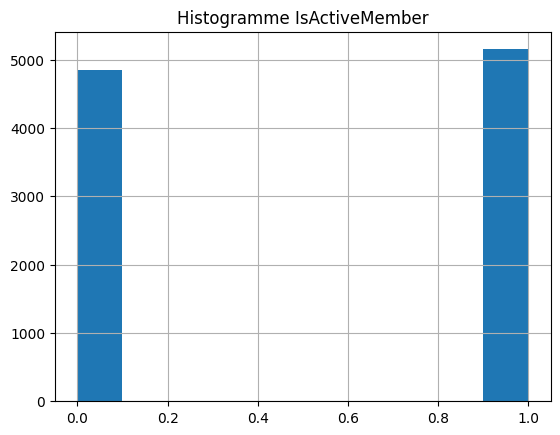

In [15]:
df["IsActiveMember"].hist()
plt.title("Histogramme IsActiveMember")

Text(0.5, 1.0, 'Histogramme Exited')

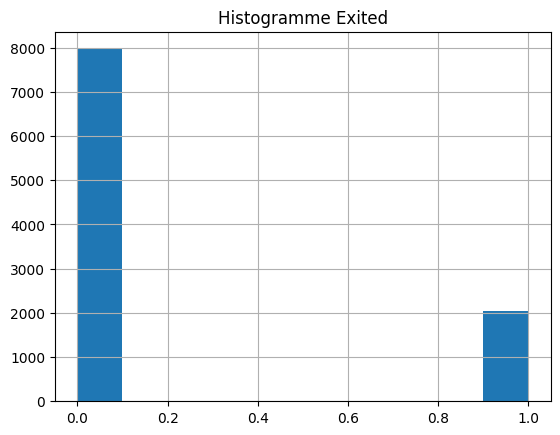

In [16]:
df["Exited"].hist()
plt.title("Histogramme Exited")

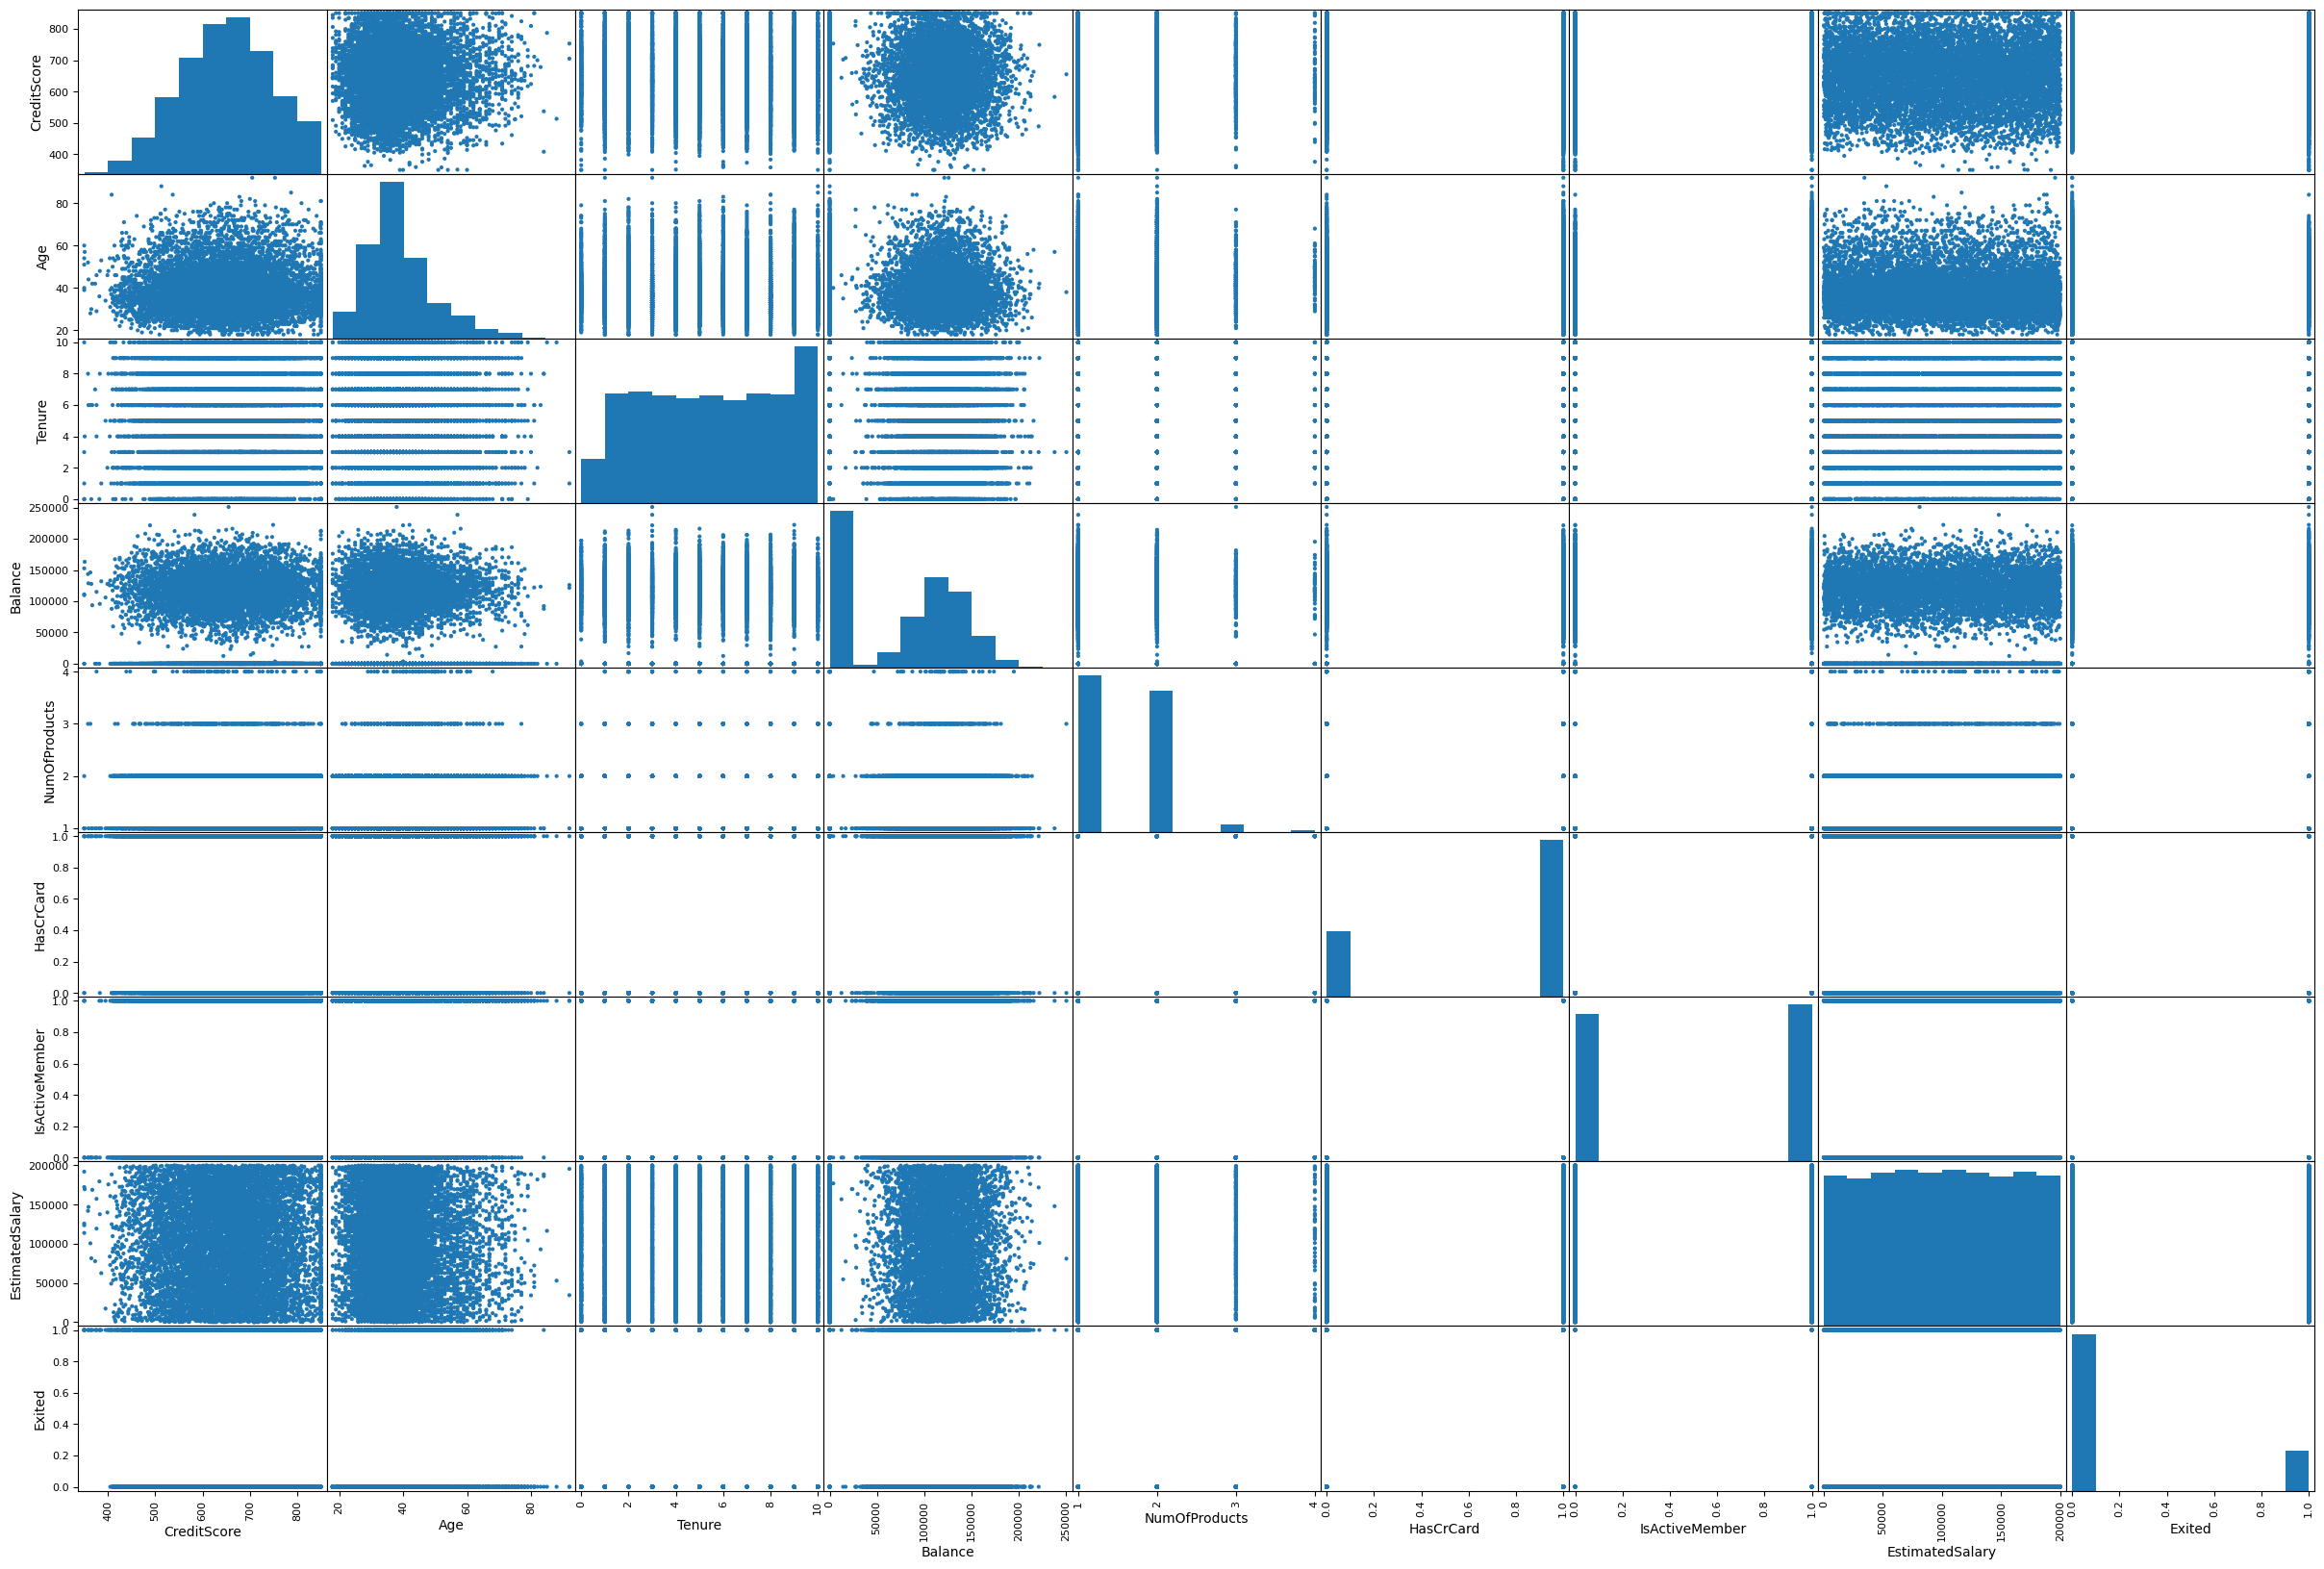

In [17]:
pd.plotting.scatter_matrix(df, alpha = 1, figsize = (30, 20))
plt.show()

<Axes: ylabel='CreditScore'>

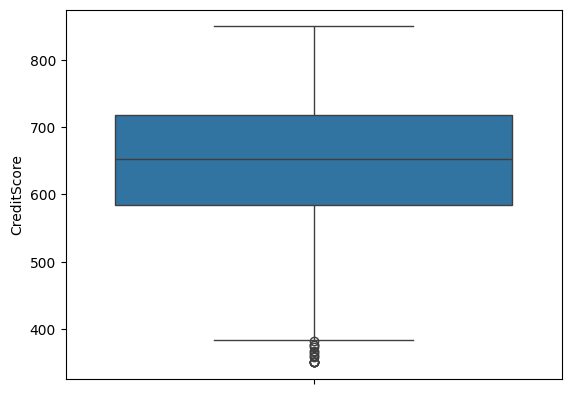

In [18]:
sns.boxplot(df['CreditScore'])

<Axes: ylabel='Age'>

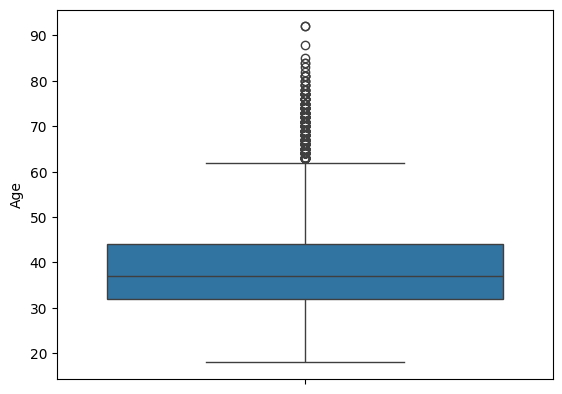

In [19]:
sns.boxplot(df['Age'])

<Axes: ylabel='Tenure'>

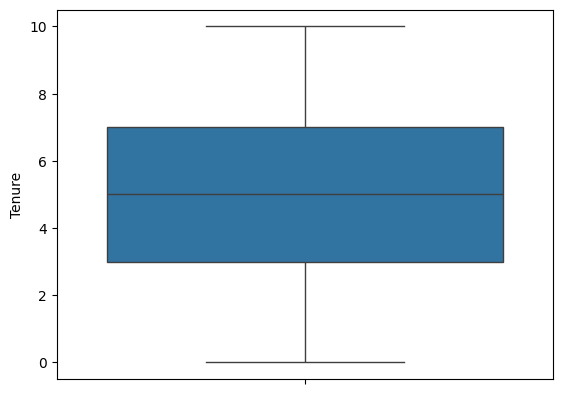

In [20]:
sns.boxplot(df['Tenure'])

<Axes: ylabel='Balance'>

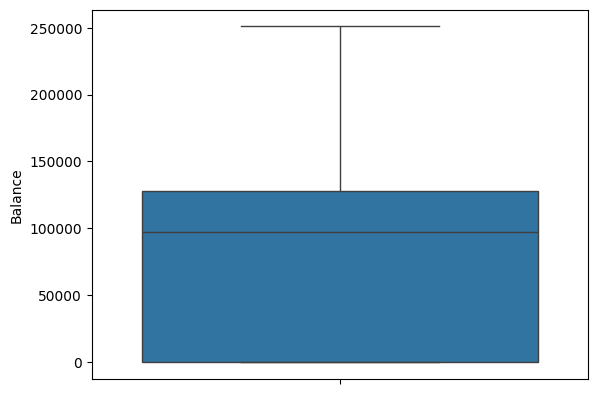

In [21]:
sns.boxplot(df['Balance'])

<Axes: ylabel='NumOfProducts'>

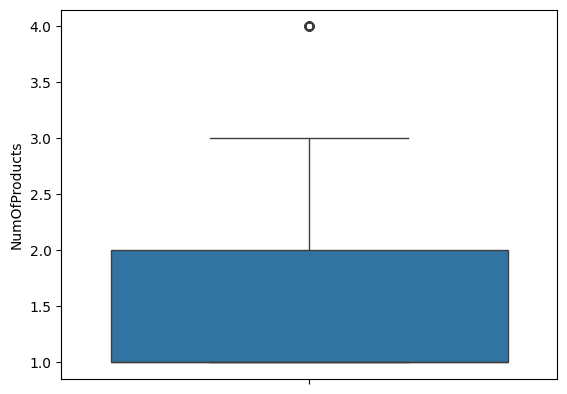

In [22]:
sns.boxplot(df['NumOfProducts'])

<Axes: ylabel='EstimatedSalary'>

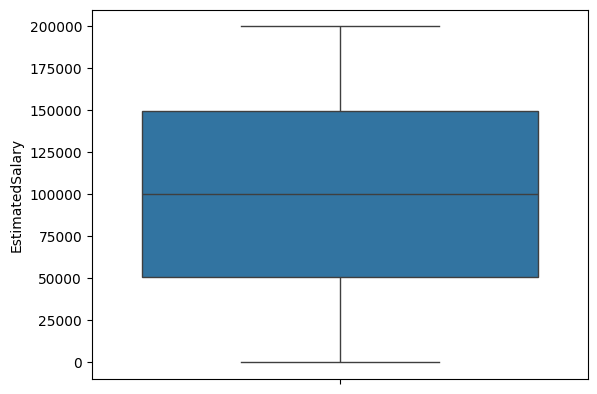

In [23]:
sns.boxplot(df['EstimatedSalary'])

Text(0, 0.5, 'Pourcentage de salariés')

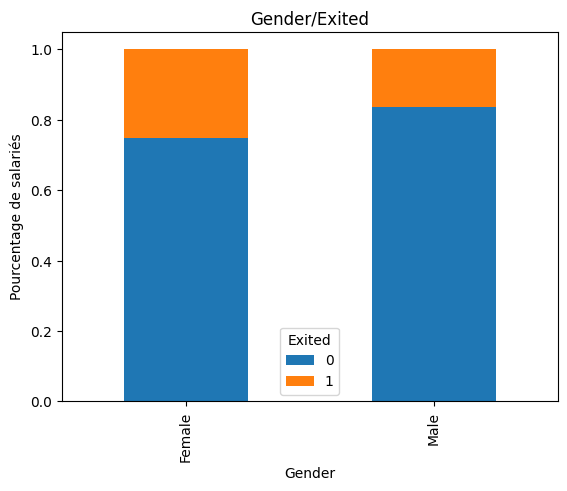

In [24]:
table=pd.crosstab(df.Gender,df.Exited)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.title("Gender/Exited")
plt.xlabel("Gender")
plt.ylabel("Pourcentage de salariés")

Text(0, 0.5, 'Pourcentage de salariés')

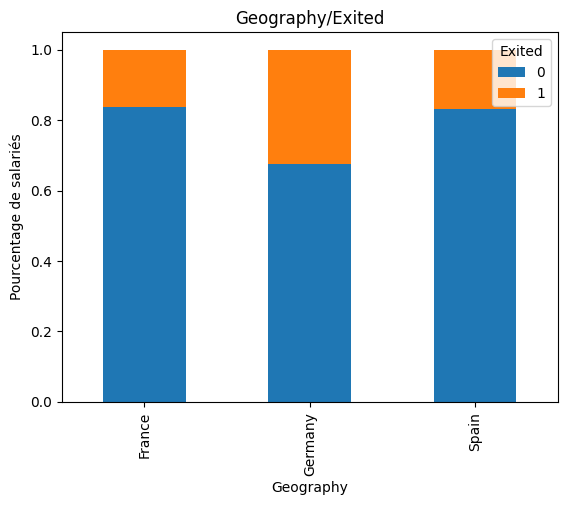

In [25]:
tablee=pd.crosstab(df.Geography,df.Exited)
tablee.div(tablee.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.title("Geography/Exited")
plt.xlabel("Geography")
plt.ylabel("Pourcentage de salariés")

Text(0, 0.5, 'Pourcentage de salariés')

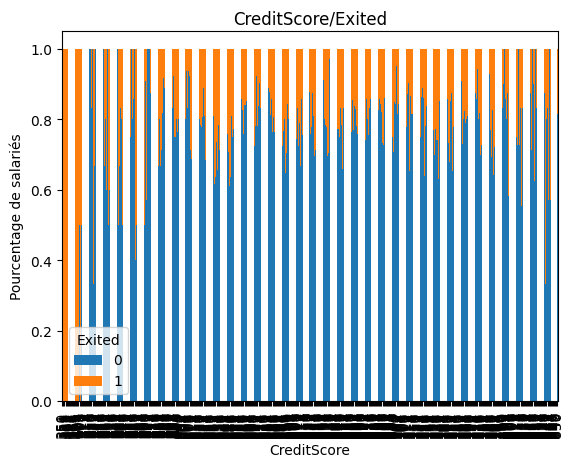

In [26]:
table1=pd.crosstab(df.CreditScore,df.Exited)
table1.div(table1.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.title("CreditScore/Exited")
plt.xlabel("CreditScore")
plt.ylabel("Pourcentage de salariés")

Text(0, 0.5, 'Pourcentage de salariés')

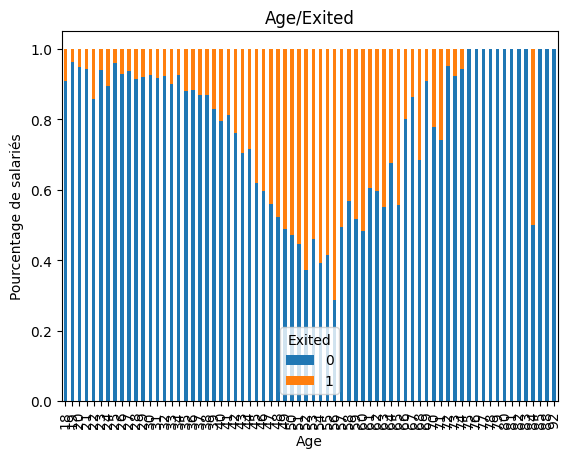

In [27]:
table2=pd.crosstab(df.Age,df.Exited)
table2.div(table2.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.title("Age/Exited")
plt.xlabel("Age")
plt.ylabel("Pourcentage de salariés")

Text(0, 0.5, 'Pourcentage de salariés')

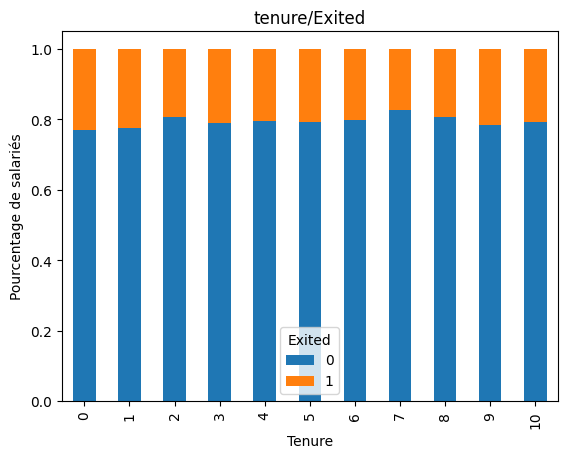

In [28]:
table3=pd.crosstab(df.Tenure,df.Exited)
table3.div(table3.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.title("tenure/Exited")
plt.xlabel("Tenure")
plt.ylabel("Pourcentage de salariés")

Text(0, 0.5, 'Pourcentage de salariés')

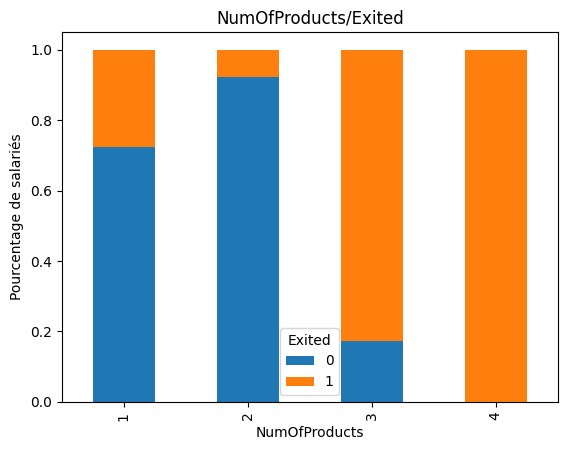

In [29]:
table4=pd.crosstab(df.NumOfProducts,df.Exited)
table4.div(table4.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.title("NumOfProducts/Exited")
plt.xlabel("NumOfProducts")
plt.ylabel("Pourcentage de salariés")

## **Pré-traitement des Données**

### Detection des données dupliquées

In [30]:
duplicate = df[df.duplicated()]
duplicate #there is no data duplicated

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


## Gestion des valeurs aberrantes

Les valeurs aberrantes (outliers) représentent des observations dont les valeurs s’écartent significativement du comportement général des données. Dans le cadre de notre projet de prédiction du churn bancaire, la présence de telles valeurs peut fausser l’analyse exploratoire, perturber la phase d’apprentissage des modèles de machine learning et dégrader leurs performances.

1. Identification des valeurs aberrantes

L’identification des valeurs aberrantes a été réalisée principalement sur les variables numériques telles que l’âge, le solde du compte (Balance), le score de crédit (CreditScore) et le salaire estimé (EstimatedSalary).
Des méthodes statistiques et graphiques ont été utilisées, notamment :

l’analyse des boxplots pour visualiser les valeurs extrêmes,

la méthode de l’écart interquartile (IQR) afin de détecter les observations situées en dehors des bornes acceptables.

2. Traitement des valeurs aberrantes

Après identification, plusieurs stratégies ont été envisagées. Étant donné le contexte bancaire, certaines valeurs élevées (par exemple un solde ou un salaire important) peuvent être légitimes et représenter des profils clients spécifiques à forte valeur.
Ainsi, au lieu de supprimer systématiquement ces observations, nous avons privilégié :

la conservation des valeurs pertinentes lorsqu’elles sont cohérentes avec le métier,

l’atténuation de l’impact des valeurs extrêmes via la normalisation des données,

l’exclusion uniquement des valeurs manifestement erronées ou incohérentes.

3. Impact sur la modélisation

Cette approche permet de préserver l’information contenue dans les données tout en limitant l’influence négative des valeurs aberrantes sur les algorithmes de classification. La gestion adaptée des outliers contribue ainsi à améliorer la stabilité, la robustesse et la capacité de généralisation des modèles prédictifs développés dans ce projet.

In [31]:
def detect_outliers(df, features):
    outlier_indices = []

    for c in features:
        Q1 = np.percentile(df[c], 25)
        Q3 = np.percentile(df[c], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR

        outlier_list_col = df[
            (df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)
        ].index

        outlier_indices.extend(outlier_list_col)

    outlier_indices = Counter(outlier_indices)

    # indices appearing more than once (for multiple features)
    multiple_outliers = [i for i, v in outlier_indices.items() if v > 0]

    return multiple_outliers

In [32]:
outlier_idx = detect_outliers(df, ['CreditScore'])
outliers = df.loc[outlier_idx]
outliers

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
942,376,France,Female,46,6,0.00,1,1,0,157333.69,1
1193,363,Spain,Female,28,6,146098.43,3,1,0,100615.14,1
1405,359,France,Female,44,6,128747.69,1,1,0,146955.71,1
1631,350,Spain,Male,54,1,152677.48,1,1,1,191973.49,1
1838,350,Germany,Male,39,0,109733.20,2,0,0,123602.11,1
1962,358,Spain,Female,52,8,143542.36,3,1,0,141959.11,1
2473,351,Germany,Female,57,4,163146.46,1,1,0,169621.69,1
2579,365,Germany,Male,30,0,127760.07,1,1,0,81537.85,1
8154,367,Spain,Male,42,6,93608.28,1,1,0,168816.73,1


In [33]:
#pourcentage des valeurs manquantes :
percentage=(len(outliers)/len(df))*100
percentage

0.15

Dans le cadre de notre projet de prédiction du churn bancaire, la suppression des valeurs aberrantes a été un choix méthodologique motivé par des considérations à la fois statistiques et opérationnelles.

Premièrement, certaines valeurs extrêmes identifiées dans les variables numériques (telles que l’âge, le solde du compte ou le salaire estimé) représentaient des observations très éloignées de la distribution globale des données. Ces valeurs avaient une influence disproportionnée sur les modèles de machine learning, en particulier ceux sensibles aux distances et aux variations extrêmes (comme la régression logistique ou les algorithmes basés sur des mesures de similarité). Leur présence entraînait un biais dans l’apprentissage et réduisait la capacité de généralisation des modèles.

Deuxièmement, l’analyse exploratoire a montré que ces outliers concernaient un nombre très limité d’observations, souvent atypiques et peu représentatives du comportement moyen des clients. Leur suppression n’affecte donc pas significativement l’information globale du jeu de données, mais permet au contraire d’obtenir des distributions plus stables et plus homogènes.

In [34]:
outliers_list = detect_outliers(df, ['CreditScore'])
df = df.drop(outliers_list, axis=0)

In [35]:
outliers_age=df.loc[detect_outliers(df,['Age'])]
outliers_age

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
58,511,Spain,Female,66,4,0.00,1,1,0,1643.11,1
85,652,Spain,Female,75,10,0.00,2,1,1,114675.75,0
104,670,Spain,Female,65,1,0.00,1,1,1,177655.68,1
158,646,France,Female,73,6,97259.25,1,0,1,104719.66,0
181,510,France,Male,65,2,0.00,2,1,1,48071.61,0
...,...,...,...,...,...,...,...,...,...,...,...
9753,656,Germany,Male,68,7,153545.11,1,1,1,186574.68,0
9765,445,France,Male,64,2,136770.67,1,0,1,43678.06,0
9832,595,Germany,Female,64,2,105736.32,1,1,1,89935.73,1
9894,521,France,Female,77,6,0.00,2,1,1,49054.10,0


In [36]:
outliers_age = detect_outliers(df, ['Age'])
percentage_age = (len(outliers_age) / len(df)) * 100
print(f"Pourcentage d’outliers (Age) : {percentage_age:.2f}%")
df = df.drop(outliers_age, axis=0)
df

Pourcentage d’outliers (Age) : 3.60%


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [37]:
outliers2=detect_outliers(df,['NumOfProducts'])
percentage_numProd=(len(outliers2)/len(df))*100
print(f"Pourcentage d’outliers (Age) : {percentage_numProd:.2f}%")


Pourcentage d’outliers (Age) : 0.60%


## Data Transformation

### Label Encoding

Dans la phase de transformation des données, nous avons adopté la technique du Label Encoding pour le traitement de certaines variables catégorielles. Ce choix est motivé par des considérations liées à la nature des variables, à la simplicité de mise en œuvre et à la compatibilité avec les modèles utilisés dans notre projet.

Premièrement, les variables catégorielles présentes dans le jeu de données, telles que le genre (Gender) ou la zone géographique (Geography), comportent un nombre limité de modalités. Le Label Encoding permet de convertir efficacement ces catégories en valeurs numériques tout en conservant l’information essentielle, sans augmenter inutilement la dimension du jeu de données.

Deuxièmement, cette méthode est moins coûteuse en termes de complexité que le One-Hot Encoding, qui aurait entraîné une augmentation du nombre de variables et un risque accru de surapprentissage, notamment avec un volume de données modéré.

Troisièmement, dans le cadre de notre projet, les modèles de classification utilisés sont capables de gérer des variables encodées sous forme numérique discrète sans interpréter systématiquement l’ordre implicite comme une relation strictement linéaire, ce qui rend le Label Encoding pertinent.

Enfin, le Label Encoding facilite la standardisation du pipeline de prétraitement et améliore la rapidité d’entraînement des modèles, tout en garantissant une transformation cohérente et reproductible des données.

In [38]:
from sklearn.preprocessing import OrdinalEncoder

In [39]:
enc = OrdinalEncoder()
x=df[["Geography","Gender"]].to_numpy()
df[["Geography","Gender"]]=enc.fit_transform(x)

In [40]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0.0,0.0,42,2,0.00,1,1,1,101348.88,1
1,608,2.0,0.0,41,1,83807.86,1,0,1,112542.58,0
2,502,0.0,0.0,42,8,159660.80,3,1,0,113931.57,1
3,699,0.0,0.0,39,1,0.00,2,0,0,93826.63,0
4,850,2.0,0.0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0.0,1.0,39,5,0.00,2,1,0,96270.64,0
9996,516,0.0,1.0,35,10,57369.61,1,1,1,101699.77,0
9997,709,0.0,0.0,36,7,0.00,1,0,1,42085.58,1
9998,772,1.0,1.0,42,3,75075.31,2,1,0,92888.52,1


## Etude de correlation

In [41]:
matrice_correlation=df.corr()
display(matrice_correlation)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,0.010272,-0.004011,-0.013055,-0.000798,0.007229,0.011554,-0.000914,0.020416,0.002609,-0.016413
Geography,0.010272,1.000000,0.003185,0.028630,0.003053,0.067058,0.005462,-0.011279,0.008327,-0.004704,0.034216
Gender,-0.004011,0.003185,1.000000,-0.030700,0.014560,0.010465,-0.021116,0.006538,0.021880,-0.007245,-0.106762
Age,-0.013055,0.028630,-0.030700,1.000000,-0.010576,0.041412,-0.032473,-0.016363,0.017838,-0.005601,0.358494
Tenure,-0.000798,0.003053,0.014560,-0.010576,1.000000,-0.012925,0.015049,0.019781,-0.027236,0.010031,-0.012872
Balance,0.007229,0.067058,0.010465,0.041412,-0.012925,1.000000,-0.304347,-0.013795,-0.006958,0.010241,0.116913
NumOfProducts,0.011554,0.005462,-0.021116,-0.032473,0.015049,-0.304347,1.000000,0.002714,0.011250,0.013560,-0.050669
HasCrCard,-0.000914,-0.011279,0.006538,-0.016363,0.019781,-0.013795,0.002714,1.000000,-0.012287,-0.010259,-0.008491
IsActiveMember,0.020416,0.008327,0.021880,0.017838,-0.027236,-0.006958,0.011250,-0.012287,1.000000,-0.010309,-0.143424
EstimatedSalary,0.002609,-0.004704,-0.007245,-0.005601,0.010031,0.010241,0.013560,-0.010259,-0.010309,1.000000,0.009123


<Axes: >

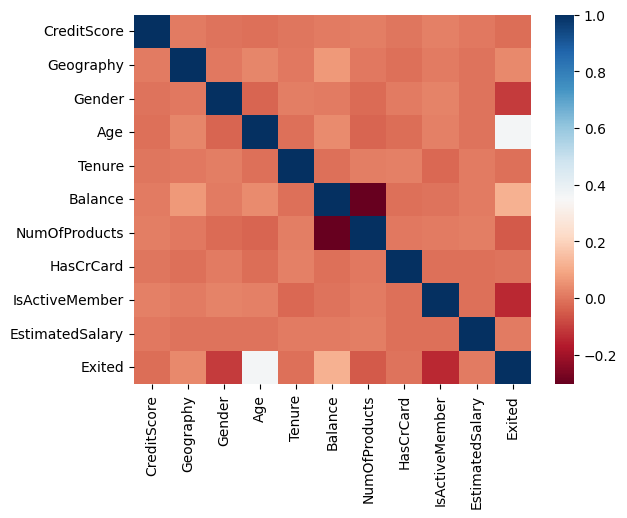

In [42]:
sns.heatmap(matrice_correlation,xticklabels=matrice_correlation.columns,yticklabels=matrice_correlation.columns,cmap="RdBu")

L’étude de corrélation a été réalisée afin d’identifier les relations entre les variables explicatives et la variable cible (churn).
Elle a permis de mettre en évidence que l’âge, le nombre de produits détenus, le statut d’activité du client (IsActiveMember) et le solde du compte (Balance) sont les variables les plus corrélées avec le churn.
L’analyse s’est appuyée sur le coefficient de corrélation de Pearson et une matrice de corrélation.
Cette étape a facilité la sélection des variables pertinentes et l’amélioration des performances des modèles.

### Normalisation des Données

La normalisation des données a été appliquée afin de mettre les variables numériques sur une **échelle comparable**.
Le **MinMax Scaler** a été choisi car il transforme les valeurs dans l’intervalle ([0,1]) tout en conservant la **distribution relative** des données.
Ce choix est particulièrement adapté aux modèles sensibles à l’échelle des variables et facilite leur convergence.
La normalisation par MinMax Scaler contribue ainsi à améliorer la stabilité et les performances des modèles.


In [43]:
from sklearn.preprocessing import MinMaxScaler
mmscaler = MinMaxScaler()
cols=['CreditScore','Age','Tenure','NumOfProducts','Balance','EstimatedSalary']
df[cols] = mmscaler.fit_transform(df[cols])

In [44]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.505353,0.0,0.0,0.545455,0.2,0.000000,0.000000,1,1,0.506735,1
1,0.481799,2.0,0.0,0.522727,0.1,0.334031,0.000000,0,1,0.562709,0
2,0.254818,0.0,0.0,0.545455,0.8,0.636357,0.666667,1,0,0.569654,1
3,0.676660,0.0,0.0,0.477273,0.1,0.000000,0.333333,0,0,0.469120,0
4,1.000000,2.0,0.0,0.568182,0.2,0.500246,0.000000,1,1,0.395400,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,0.830835,0.0,1.0,0.477273,0.5,0.000000,0.333333,1,0,0.481341,0
9996,0.284797,0.0,1.0,0.386364,1.0,0.228657,0.000000,1,1,0.508490,0
9997,0.698073,0.0,0.0,0.409091,0.7,0.000000,0.000000,0,1,0.210390,1
9998,0.832976,1.0,1.0,0.545455,0.3,0.299226,0.333333,1,0,0.464429,1


In [45]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
cols=['CreditScore','Age','Tenure','NumOfProducts','Balance','EstimatedSalary']
df[cols] = sc.fit_transform(df[cols])

In [46]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,-0.330309,0.0,0.0,0.479282,-1.044601,-1.226774,-0.914163,1,1,0.021480,1
1,-0.444790,2.0,0.0,0.365625,-1.390859,0.116386,-0.914163,0,1,0.216090,0
2,-1.547974,0.0,0.0,0.479282,1.032946,1.332056,2.529285,1,0,0.240239,1
3,0.502283,0.0,0.0,0.138311,-1.390859,-1.226774,0.807561,0,0,-0.109299,0
4,2.073800,2.0,0.0,0.592939,-1.044601,0.784746,-0.914163,1,1,-0.365608,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,1.251615,0.0,1.0,0.138311,-0.005827,-1.226774,0.807561,1,0,-0.066808,0
9996,-1.402271,0.0,1.0,-0.316318,1.725462,-0.307331,-0.914163,1,1,0.027581,0
9997,0.606357,0.0,0.0,-0.202661,0.686688,-1.226774,-0.914163,0,1,-1.008853,1
9998,1.262023,1.0,1.0,0.479282,-0.698343,-0.023567,0.807561,1,0,-0.125609,1


### Définir les variables explicatifs et la variable cible

In [47]:
X=df.drop("Exited",axis=1)
Y=df["Exited"]

In [48]:
Y.value_counts()  #Imbalanced data

,count
Exited,
0,7677
1,1949


<Axes: ylabel='count'>

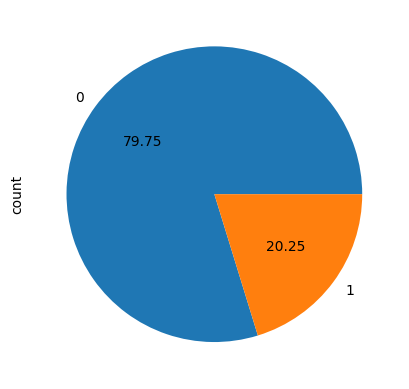

In [49]:
Y.value_counts().plot.pie(autopct='%.2f')

## Data Balancing

In [50]:
pip install -U imbalanced-learn

### Random Undersampling

L’équilibrage des données a été adopté afin de corriger le **déséquilibre entre les classes** de la variable cible (*churn*), où les clients non churners étaient largement majoritaires.
La méthode de **Random UnderSampling** a été choisie pour réduire la classe majoritaire et obtenir une distribution plus équilibrée.
Ce choix permet d’éviter le biais des modèles vers la classe dominante et d’améliorer la détection des clients churners.
Ainsi, le data balancing contribue à des prédictions plus justes et plus représentatives.


In [51]:
from imblearn.under_sampling import RandomUnderSampler

<Axes: ylabel='count'>

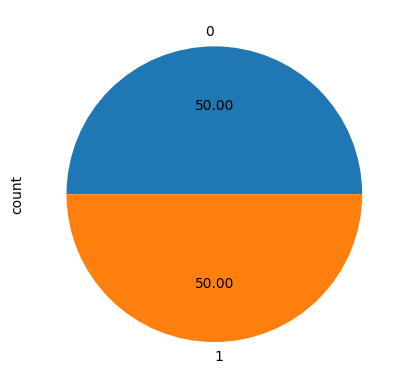

In [52]:
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, Y)
y_res.value_counts().plot.pie(autopct='%.2f')

# **Modélisation et Machine Learning**



In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score , confusion_matrix, precision_score,recall_score,f1_score, make_scorer
from sklearn.model_selection import train_test_split

## Modèle KNN (K-Nearest Neighbors)

Dans le cadre de notre projet, nous avons choisi d’utiliser l’algorithme K-Nearest Neighbors (KNN) en raison de sa simplicité, de son efficacité et de son adéquation avec la nature de nos données.

Tout d’abord, KNN est un algorithme non paramétrique, ce qui signifie qu’il ne fait aucune hypothèse préalable sur la distribution des données. Cela le rend particulièrement adapté lorsque la structure des données n’est pas connue à l’avance, comme c’est le cas dans notre projet.

Ensuite, KNN est basé sur le principe de similarité : une observation est classée en fonction des k voisins les plus proches selon une mesure de distance (généralement la distance euclidienne). Cette approche intuitive permet d’obtenir des résultats facilement interprétables et compréhensibles.

Par ailleurs, l’algorithme KNN est simple à implémenter et ne nécessite pas une phase d’apprentissage complexe. Cela facilite son utilisation, son ajustement (choix de k) et son intégration dans notre solution.

Enfin, KNN offre de bonnes performances lorsque les données sont bien normalisées et que la taille du jeu de données est raisonnable. Il constitue ainsi un bon compromis entre performance, simplicité et interprétabilité, ce qui justifie pleinement son choix pour notre projet.

In [54]:
# 1️⃣ Split du dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

# 2️⃣ Modèle KNN
knn = KNeighborsClassifier(n_neighbors=5)

# 3️⃣ Entraînement
knn.fit(X_train, y_train)

# 4️⃣ Prédictions
y_pred = knn.predict(X_test)

# 5️⃣ Évaluation
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision :", precision_score(y_test, y_pred, average='macro'))
print("Recall :", recall_score(y_test, y_pred, average='macro'))
print("F1-score :", f1_score(y_test, y_pred, average='macro'))

Accuracy : 0.842159916926272
Precision : 0.783338727853918
Recall : 0.693985924400671
F1-score : 0.7220779220779221


### Cross Validation avec 10 folds

L’ajout de la cross-validation permet d’évaluer le modèle de manière plus fiable en réduisant le risque de surapprentissage.
Elle assure que les performances obtenues sont stables et généralisables sur différents sous-ensembles de données.

In [55]:
from sklearn.model_selection import cross_val_score

model_cross = KNeighborsClassifier(n_neighbors=5)
accuracy = cross_val_score(model_cross, X, Y, cv=10,scoring=make_scorer(accuracy_score))
precision=cross_val_score(model_cross, X, Y, cv=10,scoring='precision_macro')
recall=cross_val_score(model_cross, X, Y, cv=10,scoring='recall_macro')
f1=cross_val_score(model_cross, X, Y, cv=10,scoring='f1_macro')
print("accuracy : ",accuracy.mean())
print("precision : ",precision.mean())
print("recall : ",recall.mean())
print("f1_score : ",f1.mean())

accuracy :  0.8379382257886931
precision :  0.7580578630237651
recall :  0.6886104161906298
f1_score :  0.7118527585205042


### GridSearch

Ensuite, le GridSearch est utilisé pour tester automatiquement plusieurs combinaisons d’hyperparamètres.
Cela permet de sélectionner les paramètres optimaux afin d’améliorer les performances globales du modèle.

In [56]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline

# 1️⃣ Split
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42, stratify=Y
)

# 2️⃣ Pipeline (scaling + KNN)
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

# 3️⃣ Grille des hyperparamètres
param_grid = {
    'knn__n_neighbors': [3, 5, 7, 9, 11],
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan']
}

# 4️⃣ GridSearch
grid = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='f1_macro',
    n_jobs=-1
)

# 5️⃣ Entraînement
grid.fit(X_train, y_train)

# 6️⃣ Meilleur modèle
best_model = grid.best_estimator_

# 7️⃣ Prédictions
y_pred = best_model.predict(X_test)

# 8️⃣ Évaluation
print("Best params :", grid.best_params_)
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision :", precision_score(y_test, y_pred, average='macro'))
print("Recall :", recall_score(y_test, y_pred, average='macro'))
print("F1-score :", f1_score(y_test, y_pred, average='macro'))


Best params : {'knn__metric': 'euclidean', 'knn__n_neighbors': 5, 'knn__weights': 'distance'}
Accuracy : 0.8463136033229491
Precision : 0.7795018070667846
Recall : 0.6941656650641026
F1-score : 0.721976540722115


## Decision Tree (Arbre de Décision)

Nous avons choisi le modèle Decision Tree en raison de sa grande interprétabilité et de sa capacité à modéliser des relations non linéaires entre les variables. Il permet de visualiser clairement les règles de décision, ce qui facilite la compréhension et l’analyse des résultats. De plus, il nécessite peu de préparation des données et peut gérer à la fois des variables numériques et catégorielles.

In [57]:
from sklearn.tree import DecisionTreeClassifier

# Split du dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42, stratify=Y
)

# Modèle Decision Tree
dt = DecisionTreeClassifier(
    criterion='gini',      # ou 'entropy'
    max_depth=5,           # limite la complexité
    random_state=42
)

# Entraînement
dt.fit(X_train, y_train)

# Prédictions
y_pred = dt.predict(X_test)

# Évaluation
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision :", precision_score(y_test, y_pred, average='macro'))
print("Recall :", recall_score(y_test, y_pred, average='macro'))
print("F1-score :", f1_score(y_test, y_pred, average='macro'))


Accuracy : 0.8618899273104881
Precision : 0.8475748598291017
Recall : 0.6895833333333333
F1-score : 0.7292731027514675


### Cross Validation avec 10 Folds

In [58]:
# Modèle
dt = DecisionTreeClassifier(
    criterion='gini',   # ou 'entropy'
    max_depth=5,
    random_state=42
)

# Accuracy
accuracy = cross_val_score(
    dt, X, Y, cv=10, scoring='accuracy'
)

# Precision
precision = cross_val_score(
    dt, X, Y, cv=10, scoring='precision_macro'
)

# Recall
recall = cross_val_score(
    dt, X, Y, cv=10, scoring='recall_macro'
)

# F1-score
f1 = cross_val_score(
    dt, X, Y, cv=10, scoring='f1_macro'
)

# Résultats moyens
print("Accuracy :", accuracy.mean())
print("Precision :", precision.mean())
print("Recall :", recall.mean())
print("F1-score :", f1.mean())


Accuracy : 0.854456253521674
Precision : 0.8255194160881283
Recall : 0.6792445013191821
F1-score : 0.7150436276523009


### GridSearch

In [59]:
# 1️⃣ Split train / test
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42, stratify=Y
)

# 2️⃣ Modèle Decision Tree
dt = DecisionTreeClassifier(random_state=42)

# 3️⃣ Grille des hyperparamètres
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# 4️⃣ GridSearch avec Cross Validation
grid = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=5,
    scoring='f1_macro',   # ou 'accuracy'
    n_jobs=-1
)

# 5️⃣ Entraînement
grid.fit(X_train, y_train)

# 6️⃣ Meilleur modèle
best_dt = grid.best_estimator_

# 7️⃣ Prédictions
y_pred = best_dt.predict(X_test)

# 8️⃣ Résultats
print("Best parameters :", grid.best_params_)
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision :", precision_score(y_test, y_pred, average='macro'))
print("Recall :", recall_score(y_test, y_pred, average='macro'))
print("F1-score :", f1_score(y_test, y_pred, average='macro'))


Best parameters : {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy : 0.8442367601246106
Precision : 0.7621434049079754
Recall : 0.7282552083333333
F1-score : 0.7426711606430282


## Logistic regresseion (Régression Logistique)

La régression logistique a été retenue pour sa simplicité, sa robustesse et ses bonnes performances en classification binaire. Elle fournit des résultats facilement interprétables grâce aux probabilités et aux coefficients associés aux variables. En outre, elle est efficace sur des données linéairement séparables et constitue un bon modèle de référence pour comparer les performances des autres algorithmes.

In [60]:
from sklearn.linear_model import LogisticRegression
# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42, stratify=Y
)

# Pipeline (scaling obligatoire)
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=1000))
])

# Entraînement
pipeline.fit(X_train, y_train)

# Prédictions
y_pred = pipeline.predict(X_test)

# Évaluation
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision :", precision_score(y_test, y_pred, average='macro'))
print("Recall :", recall_score(y_test, y_pred, average='macro'))
print("F1-score :", f1_score(y_test, y_pred, average='macro'))

Accuracy : 0.8219106957424714
Precision : 0.7392762003549622
Recall : 0.6186047676282052
F1-score : 0.6411219766328207


### Cross Validation avec Régression logistique

In [61]:
model = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=1000))
])

scores = cross_val_score(model, X, Y, cv=10, scoring='f1_macro')
# Accuracy
accuracy = cross_val_score(
    dt, X, Y, cv=10, scoring='accuracy'
)

# Precision
precision = cross_val_score(
    dt, X, Y, cv=10, scoring='precision_macro'
)

# Recall
recall = cross_val_score(
    dt, X, Y, cv=10, scoring='recall_macro'
)

# F1-score
f1 = cross_val_score(
    dt, X, Y, cv=10, scoring='f1_macro'
)

# Résultats moyens
print("Accuracy :", accuracy.mean())
print("Precision :", precision.mean())
print("Recall :", recall.mean())
print("F1-score :", f1.mean())

Accuracy : 0.7916082149727011
Precision : 0.6796281227440459
Recall : 0.6848290654878314
F1-score : 0.6818759681938629


### GridSearch

In [62]:
# 1️⃣ Split train / test
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42, stratify=Y
)

# 2️⃣ Pipeline (scaling obligatoire)
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=1000))
])

# 3️⃣ Grille des hyperparamètres
param_grid = {
    'logreg__C': [0.01, 0.1, 1, 10, 100],
    'logreg__penalty': ['l2'],
    'logreg__solver': ['lbfgs', 'liblinear']
}

# 4️⃣ GridSearch avec Cross Validation
grid = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='f1_macro',   # ou 'accuracy'
    n_jobs=-1
)

# 5️⃣ Entraînement
grid.fit(X_train, y_train)

# 6️⃣ Meilleur modèle
best_model = grid.best_estimator_

# 7️⃣ Prédictions
y_pred = best_model.predict(X_test)

# 8️⃣ Résultats
print("Best parameters :", grid.best_params_)
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision :", precision_score(y_test, y_pred, average='macro'))
print("Recall :", recall_score(y_test, y_pred, average='macro'))
print("F1-score :", f1_score(y_test, y_pred, average='macro'))

Best parameters : {'logreg__C': 1, 'logreg__penalty': 'l2', 'logreg__solver': 'liblinear'}
Accuracy : 0.8213914849428868
Precision : 0.7379631886884446
Recall : 0.6173227163461539
F1-score : 0.6395401218246274


# **Résultats et Benchmarking des Modéles ML**

In [64]:
from google.colab import files
from IPython.display import Image

In [65]:
uploaded = files.upload()

Saving Screenshot 2025-12-17 at 02.58.54.png to Screenshot 2025-12-17 at 02.58.54.png


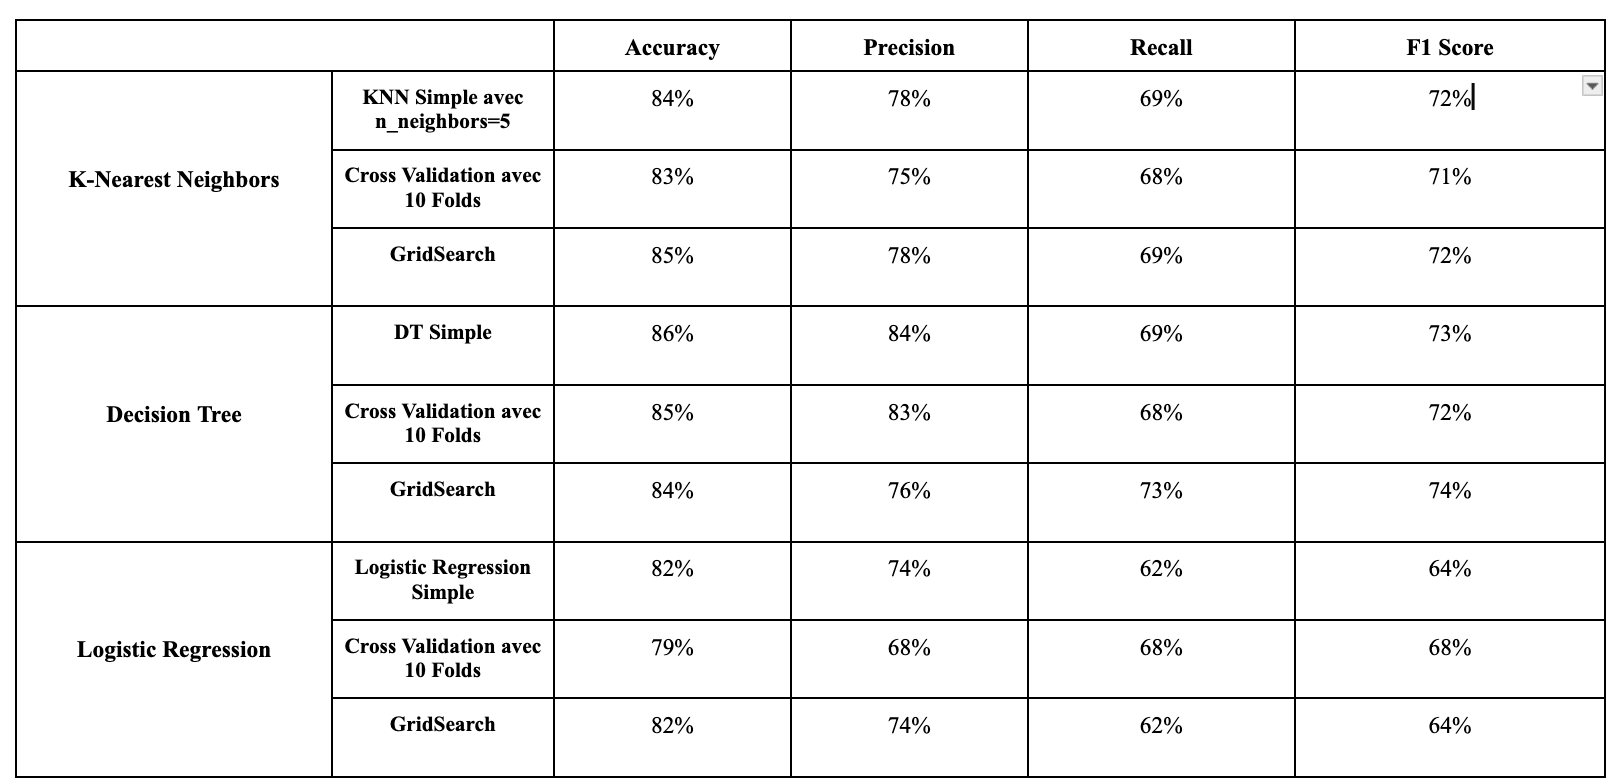

In [66]:
Image('Screenshot 2025-12-17 at 02.58.54.png')

Dans cette étude, nous avons évalué les performances de trois algorithmes de Machine Learning, à savoir K-Nearest Neighbors (KNN), Decision Tree et Logistic Regression, en utilisant plusieurs métriques : Accuracy, Precision, Recall et F1-score. Pour chaque modèle, trois configurations ont été testées : une version simple, une version avec cross-validation à 10 folds, et une version optimisée via GridSearch.

Les résultats montrent que le Decision Tree obtient globalement les meilleures performances. En particulier, la version optimisée par GridSearch atteint le meilleur F1-score (74%), avec un bon équilibre entre la précision (76%) et le rappel (73%). Ce score est supérieur à ceux obtenus par KNN, dont le F1-score maximal atteint 72%, et par la régression logistique, qui reste limitée à un F1-score de 68% au mieux.

Le modèle KNN présente des performances stables, avec une légère amélioration après l’optimisation par GridSearch (accuracy de 85%), mais son rappel reste relativement limité, ce qui peut poser problème dans des contextes où la détection des classes positives est cruciale. Quant à la régression logistique, bien qu’elle soit simple et robuste, elle affiche les performances les plus faibles, notamment en termes de rappel et de F1-score, indiquant une capacité limitée à capturer des relations complexes dans les données.

Sur la base de ce benchmarking, le Decision Tree optimisé par GridSearch est retenu comme le modèle le plus performant dans le cadre de notre projet, car il offre le meilleur compromis entre précision, rappel et F1-score.

# **Discussion et Limites des Modéles**

Malgré les performances satisfaisantes obtenues par les modèles de Machine Learning étudiés, plusieurs limites doivent être soulignées. Tout d’abord, ces modèles reposent principalement sur des caractéristiques manuelles et peinent à capturer des relations complexes ou de haut niveau présentes dans les données. Par exemple, la régression logistique suppose une séparation linéaire, tandis que KNN et Decision Tree peuvent être sensibles au bruit et au surapprentissage.

De plus, l’amélioration apportée par la cross-validation et le GridSearch reste relativement limitée, ce qui suggère que les performances sont désormais contraintes par la capacité intrinsèque des modèles plutôt que par le choix des hyperparamètres. Cela indique un plafond de performance pour les approches classiques de Machine Learning dans notre contexte.

Dans cette optique, il serait pertinent de passer à des modèles de Deep Learning, qui offrent une capacité supérieure à apprendre automatiquement des représentations complexes à partir des données. Contrairement aux modèles de Machine Learning traditionnels, les réseaux de neurones profonds peuvent exploiter des structures non linéaires complexes et améliorer significativement les performances, en particulier lorsque le volume de données augmente.

Ainsi, bien que les modèles de Machine Learning aient permis d’établir une base solide et interprétable, l’adoption de techniques de Deep Learning apparaît comme une perspective prometteuse pour dépasser les limites actuelles et obtenir de meilleurs résultats dans les travaux futurs.

# **Conclusion**

Ce projet a permis de comparer et d’évaluer plusieurs modèles de Machine Learning à travers un benchmarking rigoureux basé sur des métriques pertinentes. Les résultats ont montré que le Decision Tree optimisé par GridSearch offre les meilleures performances globales. Toutefois, les limites observées soulignent la nécessité d’explorer des approches plus avancées. Ainsi, le Deep Learning constitue une perspective prometteuse pour améliorer davantage les performances et répondre aux exigences futures du projet.